# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

## Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic regression model on the training data.
- Check the accuracy on the test data.
Note: So far we have not balanced the data.

## Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [2]:
# To make run all you ask in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
churndata = pd.read_csv('Customer-Churn.csv')

In [4]:
churndata.head()
churndata.shape

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


(7043, 16)

In [129]:
rows = churndata.shape[0]
columns = churndata.shape[1]
print("The train churndataset contains {0} rows and {1} columns.\n".format(rows, columns))
churndata_info= pd.DataFrame({"dtype": churndata.dtypes, "unique": churndata.nunique(), "missing%": (churndata.isnull().sum()/churndata.shape[0])*100})

churndata_describe = churndata.describe().T
churndata_describe = churndata_describe.drop(['count','min','25%','50%','75%','max'],axis=1)


churndata_info= pd.concat((churndata_info, churndata_describe), axis= 1)
churndata_info = churndata_info.T

churndata_info.T

churndata_song = churndata.select_dtypes(include='object')

churndata_quantiles = churndata.describe().T
churndata_quantiles = churndata_quantiles.drop(['count','mean','std'],axis=1)
churndata_quantiles.T
churndata.describe(include='object').T

The train churndataset contains 7043 rows and 16 columns.



,dtype,unique,missing%,mean,std
gender,object,2,0,NaN,NaN
SeniorCitizen,object,2,0,NaN,NaN
Partner,object,2,0,NaN,NaN
Dependents,object,2,0,NaN,NaN
tenure,int64,73,0,32.3711,24.5595
PhoneService,object,2,0,NaN,NaN
OnlineSecurity,object,3,0,NaN,NaN
OnlineBackup,object,3,0,NaN,NaN
DeviceProtection,object,3,0,NaN,NaN
TechSupport,object,3,0,NaN,NaN


,tenure,MonthlyCharges,TotalCharges
min,0.0,18.25,18.799999
25%,9.0,35.50,402.225006
50%,29.0,70.35,1400.550049
75%,55.0,89.85,3786.599976
max,72.0,118.75,8684.799805


,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473
StreamingTV,7043,3,No,2810


In [6]:
s = pd.Series(churndata['TotalCharges'])

s.isna().sum()

0

In [7]:
def clean_spac(row):
    return row.replace(" ","")
churndata['TotalCharges'] = list(map(clean_spac,churndata['TotalCharges']))
churndata['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [8]:
churndata['TotalCharges'] = pd.to_numeric(s,downcast = 'float')
churndata['SeniorCitizen'] =churndata['SeniorCitizen'].astype('object')
churndata['TotalCharges'].isna().sum()

11

In [9]:
churndata_info= pd.DataFrame({"dtype": churndata.dtypes, "unique": churndata.nunique(), "missing%": (churndata.isnull().sum()/churndata.shape[0])*100})
churndata_info

,dtype,unique,missing%
gender,object,2,0.000000
SeniorCitizen,object,2,0.000000
Partner,object,2,0.000000
Dependents,object,2,0.000000
tenure,int64,73,0.000000
PhoneService,object,2,0.000000
OnlineSecurity,object,3,0.000000
OnlineBackup,object,3,0.000000
DeviceProtection,object,3,0.000000
TechSupport,object,3,0.000000


C:\Users\Jacqu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

<function matplotlib.pyplot.show(close=None, block=None)>

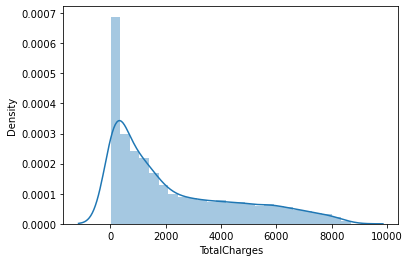

In [10]:
sns.distplot(churndata['TotalCharges'])
plt.show

In [11]:
churndata['TotalCharges'] = churndata['TotalCharges'].fillna(np.mean(churndata['TotalCharges']))

In [12]:
churndata_info= pd.DataFrame({"dtype": churndata.dtypes, "unique": churndata.nunique(), "missing%": (churndata.isnull().sum()/churndata.shape[0])*100})
churndata_info

,dtype,unique,missing%
gender,object,2,0.0
SeniorCitizen,object,2,0.0
Partner,object,2,0.0
Dependents,object,2,0.0
tenure,int64,73,0.0
PhoneService,object,2,0.0
OnlineSecurity,object,3,0.0
OnlineBackup,object,3,0.0
DeviceProtection,object,3,0.0
TechSupport,object,3,0.0


C:\Users\Jacqu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

<function matplotlib.pyplot.show(close=None, block=None)>

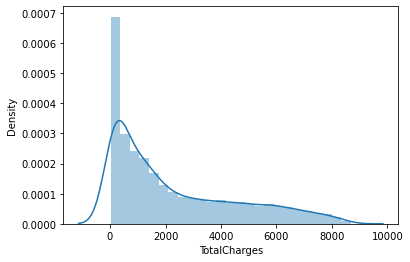

In [13]:
sns.distplot(churndata['TotalCharges'])
plt.show

In [14]:
numerical = churndata.select_dtypes(np.number)
categorical = churndata.select_dtypes(include = 'object')

In [15]:
#categorical = pd.get_dummies(categorical, drop_first = True)

In [16]:
churn = categorical['Churn']
senior = categorical['SeniorCitizen']

In [17]:
data = pd.concat((numerical,senior,churn), axis=1)
data

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
0,1,29.85,29.850000,0,No
1,34,56.95,1889.500000,0,No
2,2,53.85,108.150002,0,Yes
3,45,42.30,1840.750000,0,No
4,2,70.70,151.649994,0,Yes
...,...,...,...,...,...
7038,24,84.80,1990.500000,0,No
7039,72,103.20,7362.899902,0,No
7040,11,29.60,346.450012,0,No
7041,4,74.40,306.600006,1,Yes


In [112]:
X = data.drop(['Churn'], axis = 1)
y = data['Churn']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=50)

In [114]:
X_train

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
6096,1,70.20,70.199997,1
6176,43,77.85,3365.850098,0
2437,7,61.40,438.899994,0
5110,8,73.50,632.200012,0
4334,11,76.40,838.700012,0
...,...,...,...,...
2014,13,61.80,750.099976,0
6253,56,44.85,2564.949951,0
1931,53,111.80,5809.750000,0
5600,7,69.95,529.500000,0


In [115]:
X_train
y_train

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
6096,1,70.20,70.199997,1
6176,43,77.85,3365.850098,0
2437,7,61.40,438.899994,0
5110,8,73.50,632.200012,0
4334,11,76.40,838.700012,0
...,...,...,...,...
2014,13,61.80,750.099976,0
6253,56,44.85,2564.949951,0
1931,53,111.80,5809.750000,0
5600,7,69.95,529.500000,0


6096     No
6176    Yes
2437     No
5110     No
4334     No
       ... 
2014     No
6253     No
1931     No
5600    Yes
5808     No
Name: Churn, Length: 5634, dtype: object

In [128]:
#from sklearn.preprocessing import StandardScaler
#Standardtransformer = StandardScaler().fit(X_train)
#X_scaled = Standardtransformer.transform(X_train)
#X_scaled.shape
#X_scaled = pd.DataFrame(X_scaled,columns=X_train.columns)

y_train
X_train

(5634, 4)

6096     No
6176    Yes
2437     No
5110     No
4334     No
       ... 
2014     No
6253     No
1931     No
5600    Yes
5808     No
Name: Churn, Length: 5634, dtype: object

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
6096,1,70.20,70.199997,1
6176,43,77.85,3365.850098,0
2437,7,61.40,438.899994,0
5110,8,73.50,632.200012,0
4334,11,76.40,838.700012,0
...,...,...,...,...
2014,13,61.80,750.099976,0
6253,56,44.85,2564.949951,0
1931,53,111.80,5809.750000,0
5600,7,69.95,529.500000,0


In [125]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.7856635911994322

In [126]:
y_test.value_counts()

No     1041
Yes     368
Name: Churn, dtype: int64

In [119]:
y_train

6096     No
6176    Yes
2437     No
5110     No
4334     No
       ... 
2014     No
6253     No
1931     No
5600    Yes
5808     No
Name: Churn, Length: 5634, dtype: object

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()

# need to randomize X and y, but together
#churndata = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
#churndata.columns = [0,1,2,3,'y']
#churndata = churndata.sample(frac=1)
#churndata.head()
#X=np.array(churndata.loc[:, churndata.columns != 'y'])
#y=np.array(churndata['y'])

scores = cross_val_score(model, X_scaled, y_train, cv=10)
scores

array([0.71099291, 0.69148936, 0.70567376, 0.70035461, 0.70870337,
       0.70337478, 0.71225577, 0.70870337, 0.69626998, 0.73889876])

In [69]:
mean_score = scores.mean()

In [70]:
print(X_scaled.shape)
print(y_train.shape)

(8278, 4)
(8278,)


In [71]:
from sklearn.neighbors import KNeighborsClassifier
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()


#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_scaled, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.8494796686703001, 'Logistic Regression': 0.7294031742693748, 'KNN': 0.7680594255472022}


In [60]:
val_scores = {}
i=0
for model in model_pipeline:
    model.fit(X_train, y_train)
    val_scores[model_names[i]] = model.score(X_test,y_test)
    i = i+1
print(val_scores)

DecisionTreeClassifier()

LogisticRegression()

KNeighborsClassifier()

{'Classification Tree': 0.8613526570048309, 'Logistic Regression': 0.7444444444444445, 'KNN': 0.7671497584541063}


In [85]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20,
                             min_samples_split=10,
                             min_samples_leaf =10)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10)

0.8476685189659338
0.7705314009661836


In [83]:
pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test,pred)
confmat = pd.DataFrame(confmat)
confmat.columns = ['Negative','Positive']
confmat = confmat.T
confmat.columns = ['False','True']
confmat = confmat.T
confmat 

,Negative,Positive
False,765,258
True,219,828


In [73]:
random_forest_results = pd.DataFrame(y_test.value_counts())
no = y_test.value_counts()[0]
yes = y_test.value_counts()[1]

print('Random Forest\nChurn predictions')
random_forest_results

Random Forest
Churn predictions


,Churn
Yes,1047
No,1023


In [74]:
churn_yes = data[data['Churn'] == 'Yes']
churn_no = data[data['Churn'] == 'No']

In [75]:
churn_no

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
0,1,29.85,29.850000,0,No
1,34,56.95,1889.500000,0,No
3,45,42.30,1840.750000,0,No
6,22,89.10,1949.400024,0,No
7,10,29.75,301.899994,0,No
...,...,...,...,...,...
7037,72,21.15,1419.400024,0,No
7038,24,84.80,1990.500000,0,No
7039,72,103.20,7362.899902,0,No
7040,11,29.60,346.450012,0,No


In [76]:
churn_yes_oversampled = resample(churn_yes, 
                                  replace=True, 
                                  n_samples = len(churn_no))

In [77]:
churn_yes_upsampled = pd.concat([churn_no, churn_yes_oversampled], axis=0)

In [78]:
X = churn_yes_upsampled.drop(['Churn'],axis=1)
y = churn_yes_upsampled['Churn']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

In [80]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20,
                             min_samples_split=10,
                             min_samples_leaf =10)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10)

0.8452524764435854
0.7695652173913043


In [170]:
prediction = pd.DataFrame(pred)
churndata = pd.concat((churndata,prediction),axis=1)

In [157]:
pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test,pred)
confmat = pd.DataFrame(confmat)
#confmat.columns = ['Negative','Positive']
confmat = confmat.T
#confmat.columns = ['Negative','Positive']
confmat = confmat.T
confmat 


,0,1
0,828,213
1,59,309


In [177]:
churndata.head(40)

churndata = churndata[churndata['Churn']=='Yes' | churndata['0'] == 'Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,0
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.850000,No,Yes
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.500000,No,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.150002,Yes,No
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.750000,No,Yes
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.649994,Yes,No
5,Female,0,No,No,8,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,99.65,820.500000,Yes,No
6,Male,0,No,Yes,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.400024,No,No
7,Female,0,No,No,10,No,Yes,No,No,No,No,No,Month-to-month,29.75,301.899994,No,No
8,Female,0,Yes,No,28,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.050049,Yes,No
9,Male,0,No,Yes,62,Yes,Yes,Yes,No,No,No,No,One year,56.15,3487.949951,No,No


TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]

In [ ]:
[          'gender',    'SeniorCitizen',          'Partner',
             'Dependents',           'tenure',     'PhoneService',
         'OnlineSecurity',     'OnlineBackup', 'DeviceProtection',
            'TechSupport',      'StreamingTV',  'StreamingMovies',
               'Contract',   'MonthlyCharges',     'TotalCharges',
                  'Churn',                  0]

In [178]:
churndata.columns

Index([          'gender',    'SeniorCitizen',          'Partner',
             'Dependents',           'tenure',     'PhoneService',
         'OnlineSecurity',     'OnlineBackup', 'DeviceProtection',
            'TechSupport',      'StreamingTV',  'StreamingMovies',
               'Contract',   'MonthlyCharges',     'TotalCharges',
                  'Churn',                  0],
      dtype='object')

In [174]:
# For cross validation
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=10,
                             min_samples_split=20,
                             min_samples_leaf =20)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7900252572969023


In [175]:
churndata.nlargest(5, 'MonthlyCharges')
churndata.nsmallest(5, 'MonthlyCharges')
churndata.describe(include='object').T
churndata.pivot_table(index=['Churn','Contract'], values=['MonthlyCharges','TotalCharges'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,0
4586,Female,0,Yes,Yes,72,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year,118.75,8672.450195,No,NaN
2115,Female,0,No,No,71,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year,118.65,8477.599609,No,NaN
3894,Female,0,Yes,No,68,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year,118.60,7990.049805,No,NaN
4804,Female,0,No,No,61,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One year,118.60,7365.700195,No,NaN
5127,Male,0,No,No,67,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One year,118.35,7804.149902,Yes,NaN


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,0
3719,Male,0,No,No,28,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,18.25,534.700012,No,NaN
1529,Female,0,Yes,No,59,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,18.40,1057.849976,No,NaN
6652,Male,0,No,No,36,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,18.55,689.000000,No,NaN
1156,Female,0,No,No,53,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,18.70,1005.700012,No,Yes
6906,Female,0,Yes,Yes,25,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,18.70,383.649994,No,NaN


,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473
StreamingTV,7043,3,No,2810


MonthlyCharges  TotalCharges
Churn Contract                                    
No    Month-to-month       61.462635   1521.927612
      One year             62.508148   2903.095215
      Two year             60.012477   3670.511963
Yes   Month-to-month       73.019396   1164.460571
      One year             85.050904   4066.212158
      Two year             86.777083   5432.363770

In [155]:
confmat 

,Negative,Positive
False,765,258
True,219,828
